### Data Notebook: Photostim Neural Dynamics

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 200

In [2]:
data = np.load('sample_photostim_0113.npy', allow_pickle = True).item()

In [3]:
print(data.keys())

dict_keys(['u', 'y', 'y_before', 'y_after', 'u_session', 'y_session', 'x1', 'x2', 'group_ids', 'o1', 'o2'])


In [4]:
# trial data
y = data['y']
u = data['u']
num_trials = y.shape[0]
num_steps = y.shape[1]
num_neurons = y.shape[2]
print('y', y.shape)
print('u', u.shape)
T_before = 4
T_after_start = 9
T_after_end = 13
y_before = np.mean(y[:,:T_before,:],axis = 1)
y_after = np.mean(y[:,T_after_start:T_after_end,:],axis = 1)

y (2308, 16, 663)
u (2308, 663)


Text(0, 0.5, 'delta_y')

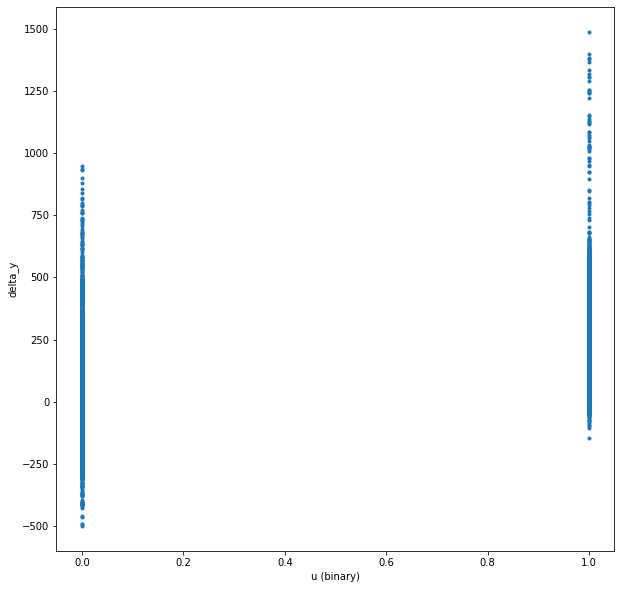

In [5]:
plt.figure(figsize=(10,10))
plt.plot(u.flatten(), (y_after-y_before).flatten(), '.')
plt.xlabel('u (binary)')
plt.ylabel('delta_y')

Text(0.5, 0, 'neuron_id')

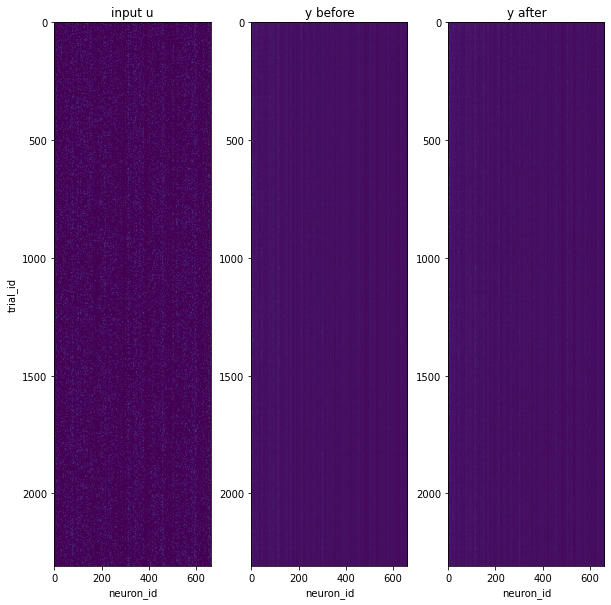

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10,10))
axes[0].imshow(u)
axes[0].set_title('input u')
axes[0].set_xlabel('neuron_id')
axes[0].set_ylabel('trial_id')
axes[1].imshow(y_before)
axes[1].set_title('y before')
axes[1].set_xlabel('neuron_id')
axes[2].imshow(y_after)
axes[2].set_title('y after')
axes[2].set_xlabel('neuron_id')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home/ajwagen/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home/ajwagen/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home/ajwagen/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <

ZeroDivisionError: integer division or modulo by zero

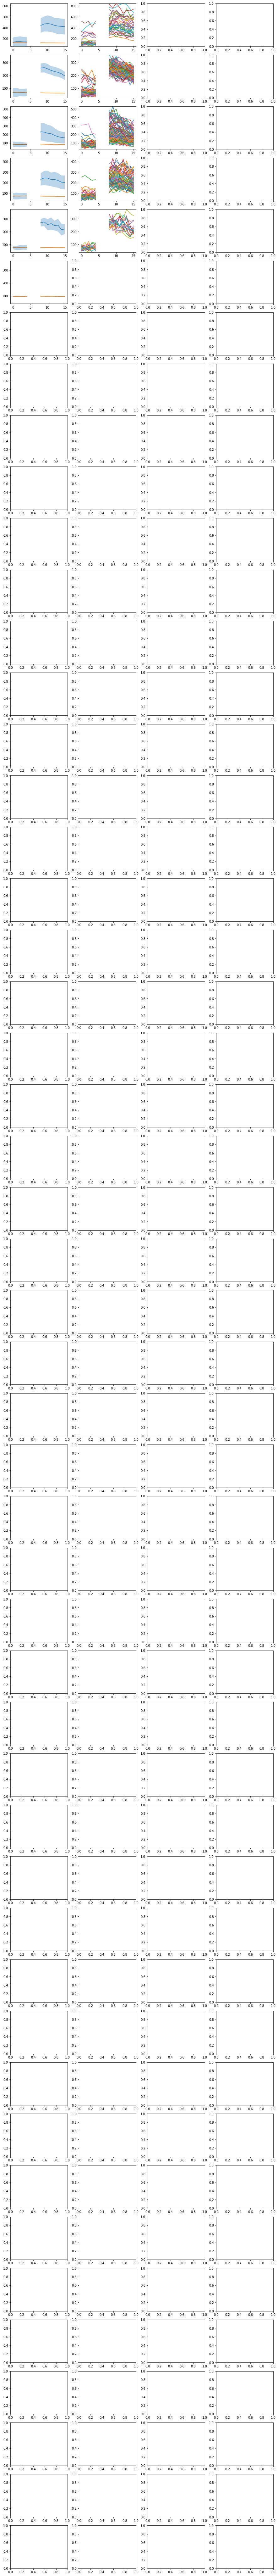

In [7]:
fig, axes = plt.subplots(50, 4, figsize = (15,150))
for vis_neuron_id in range(100):
    untargeted_trial_ids = []
    a1 = int(vis_neuron_id%50)
    a2 = int(vis_neuron_id/50)
    target_trial_ids = np.where(u[:,vis_neuron_id] == 1)[0]
    y_target_mean = np.nanmean(y[target_trial_ids,:,vis_neuron_id], axis = 0)
    y_target_std = np.nanstd(y[target_trial_ids,:,vis_neuron_id], axis = 0)
    if len(y[target_trial_ids,:,vis_neuron_id]) != 0:
        vmax = np.nanmax(y[target_trial_ids,:,vis_neuron_id])
        vmin = np.nanmin(y[target_trial_ids,:,vis_neuron_id])
    untarget_trial_ids = np.where(u[:,vis_neuron_id] == 0)[0]
    y_untarget_mean = np.nanmean(y[untarget_trial_ids,:,vis_neuron_id], axis = 0)
    axes[a1][2*a2].plot(y_target_mean)
    axes[a1][2*a2].set_ylim([vmin, vmax])
    axes[a1][2*a2].fill_between(np.arange(0,y.shape[1]), 
                                y_target_mean-y_target_std, 
                                y_target_mean+y_target_std,
                                alpha=0.3)
    axes[a1][2*a2].plot(y_untarget_mean)
    axes[a1][2*a2+1].plot(y[target_trial_ids,:,vis_neuron_id].T)
    axes[a1][2*a2+1].set_ylim([vmin, vmax])

y_session (33698, 663)
u_session (33698, 663)


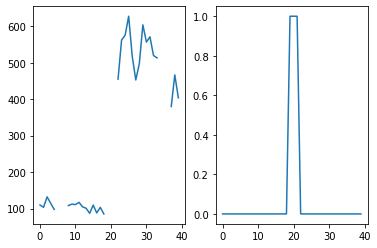

210


In [11]:
# session data
y_session = data['y_session']
u_session = data['u_session']
print('y_session', y_session.shape)
print('u_session', u_session.shape)

plt.subplot(1,2,1)
plt.plot(y_session[180:220,0])
plt.subplot(1,2,2)
plt.plot(u_session[180:220,0])
plt.show()
print(np.sum(np.isnan(y_session[0:1000,0])))

Text(0, 0.5, 'neuron_id')

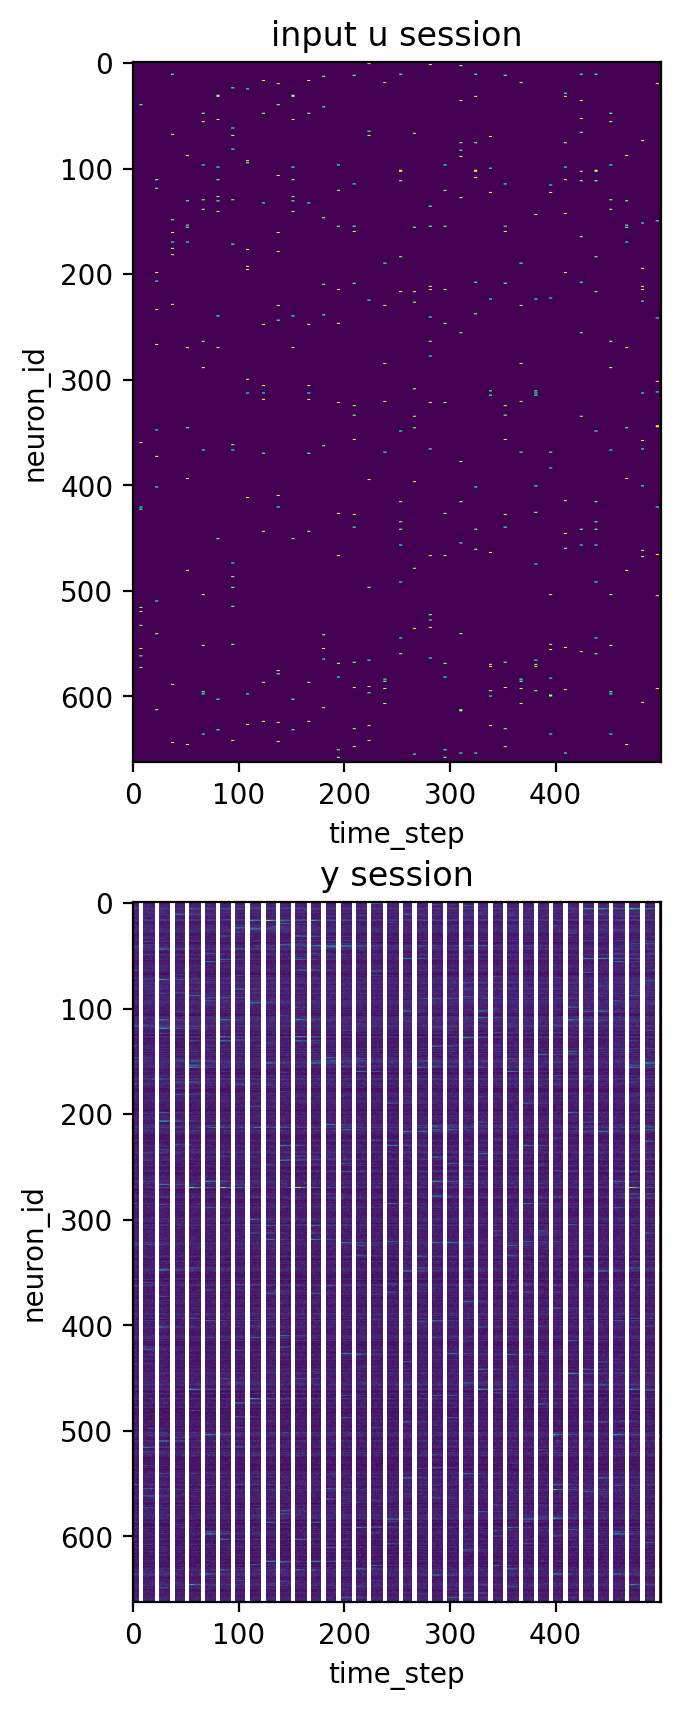

In [12]:
# nan represent removed interpolated steps in y
fig, axes = plt.subplots(2, 1, figsize=(10,10))
time_wind_start = 1000
time_wind_end = 1500
axes[0].imshow(u_session[time_wind_start: time_wind_end].T)
axes[0].set_title('input u session')
axes[0].set_xlabel('time_step')
axes[0].set_ylabel('neuron_id')
axes[1].imshow(y_session[time_wind_start: time_wind_end].T)
axes[1].set_title('y session')
axes[1].set_xlabel('time_step')
axes[1].set_ylabel('neuron_id')

In [13]:
# neuron coordinates
x1 = data['x1']
x2 = data['x2']
print('x1', x1.shape)
print('x2', x2.shape)
# optogenetics stimulation coordinates in each stimulus group, 
# each group contain 10 neurons coordinates
o1 = data['o1']
o2 = data['o2']
print('o1', o1.shape)
print('o2', o2.shape)
# group ids for all trials, range from [0,100), 100 groups
group_ids = data['group_ids']
print('group_ids', group_ids.shape)

x1 (663,)
x2 (663,)
o1 (10, 100)
o2 (10, 100)
group_ids (2308,)


In [1]:
strial_ids = 2
stim_group_id = group_ids[strial_ids]
plt.scatter(x1, x2, s = 2)
plt.scatter(o1[:, stim_group_id], 
            o2[:, stim_group_id], 
            s = 6, alpha = 0.3, color = 'red')
plt.title('optostimulation coordinates & neuron coordinates')
plt.xlabel('dim 1')
plt.ylabel('dim 2')

NameError: name 'group_ids' is not defined